# An√°lisis exploratorio de datos - Ejemplo completo

**Autor:** Jazna Meza Hidalgo

**Correo Electr√≥nico:** ja.meza@profesor.duoc.cl

**Fecha de Creaci√≥n:** Agosto de 2025

**Versi√≥n:** 1.0  

---

## Descripci√≥n

Este notebook contiene un ejemplo completo de an√°lisis exploratorio de datos (EDA). Se utiliza un set de datos de ventas de amazon.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuaci√≥n se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (2.0.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versi√≥n instalada ejecutar usando el siguiente comando, usando la librer√≠a de la cual quieres saber la versi√≥n:

```bash
import pandas as pd
print(pd.__version__)
````

# Descripci√≥n del conjunto de datos

+ product_id - Product ID
+ product_name - Name of the Product
+ category - Category of the Product
+ discounted_price - Discounted Price of the Product
+ actual_price - Actual Price of the Product
+ discount_percentage - Percentage of Discount for the Product
+ rating - Rating of the Product
+ rating_count - Number of people who voted for the Amazon rating
+ about_product - Description about the Product
+ user_id - ID of the user who wrote review for the Product
+ user_name - Name of the user who wrote review for the Product
+ review_id - ID of the user review
+ review_title - Short review
+ review_content - Long review
+ img_link - Image Link of the Product
+ product_link - Official Website Link of the Product

![](https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/imagenes_notebooks/EDA.jpeg)

üòÄ *Imagen creada con ideogram.ia*

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Carga de datos

In [2]:
# Descargar el archivo y guardarlo en el entorno
!wget https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/amazon.csv

--2025-08-30 18:13:02--  https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/amazon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4744481 (4.5M) [text/plain]
Saving to: ‚Äòamazon.csv‚Äô

amazon.csv          100%[===================>]   4.52M  --.-KB/s    in 0.08s   

2025-08-30 18:13:02 (53.7 MB/s) - ‚Äòamazon.csv‚Äô saved [4744481/4744481]



In [73]:
data = pd.read_csv("amazon.csv")

# Cantidad de observaciones y columnas

In [71]:
print(f'N√∫mero de observaciones en el conjunto : {data.shape[0]}')
print(f'N√∫mero de columnas en el conjunto : {data.shape[1]}')

N√∫mero de observaciones en el conjunto : 1465
N√∫mero de columnas en el conjunto : 16


# Revisi√≥n de calidad de los datos

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Valores nulos o faltantes

In [72]:
# Muestra una tabla con los % de nulos de cada columa
columnas_con_nulos = data.isna().sum()[data.isna().sum() > 0]
porcentaje_nulos = (columnas_con_nulos / data.shape[0]) * 100

resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

resultado

Cantidad Nulos  Porcentaje Nulos (%)
rating                     1                  0.07
rating_count               2                  0.14

---
**Comentarios**

---

+ Se distinguen 2 columnas con valores nulos, con un porcentaje relativamente bajo.

+ Estos datos deben ser tratados en la fase de preparaci√≥n de datos.

## Revisi√≥n de consistencia de tipos de datos

A continuaci√≥n se revisan los tipos de datos de las columnas para chequear que exista consistencia entre el tipo de dato y la naturaleza del mismo.

In [74]:
# Revisa los tipos de datos
data.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

Se aprecia que todas las columnas son del tipo ```object``` y las columnas que deber√°n considerar una conversi√≥n, dado lo que representan, son:

+ ```discounted_price```
+ ```actual_price```
+ ```discount_percentage```
+ ```rating```
+ ```rating_count```

### Tratamiento ```discounted_price```

In [75]:
data.discounted_price.describe()

count     1465
unique     550
top       ‚Çπ199
freq        53
Name: discounted_price, dtype: object

In [76]:
data['discounted_price'] = data['discounted_price'].astype(str)
data['discounted_price'] = data['discounted_price'].str.replace('‚Çπ','',regex=False)
data['discounted_price'] = data['discounted_price'].str.replace(',','',regex=False).astype(float)
data['discounted_price'] = pd.to_numeric(data['discounted_price'])

In [78]:
data.discounted_price.describe().round(0)

count     1465.0
mean      3125.0
std       6944.0
min         39.0
25%        325.0
50%        799.0
75%       1999.0
max      77990.0
Name: discounted_price, dtype: float64

### Tratamiento ```actual_price```

In [79]:
data.actual_price.describe()

count     1465
unique     449
top       ‚Çπ999
freq       120
Name: actual_price, dtype: object

In [80]:
data['actual_price'] = data['actual_price'].astype(str)  # Convierte a str
data['actual_price'] = data['actual_price'].str.replace('‚Çπ', '', regex=False)
data['actual_price'] = data['actual_price'].str.replace(',', '', regex=False)
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')  # Conversi√≥n a decimal

In [81]:
data.actual_price.describe().round(0)

count      1465.0
mean       5445.0
std       10875.0
min          39.0
25%         800.0
50%        1650.0
75%        4295.0
max      139900.0
Name: actual_price, dtype: float64

### Tratamiento ```discount_percentage```

In [82]:
data.discount_percentage.describe()

count     1465
unique      92
top        50%
freq        56
Name: discount_percentage, dtype: object

In [83]:
data['discount_percentage'] = data['discount_percentage'].astype(str)
data['discount_percentage'] = data['discount_percentage'].str.replace('%','').astype(float)

In [85]:
data.discount_percentage.describe().round(1)

count    1465.0
mean       47.7
std        21.6
min         0.0
25%        32.0
50%        50.0
75%        63.0
max        94.0
Name: discount_percentage, dtype: float64

### Tratamiento ```rating```

In [86]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

### Tratamiento ```rating_count```

In [87]:
data.rating_count.describe()

count      1463
unique     1143
top       9,378
freq          9
Name: rating_count, dtype: object

In [88]:
data['rating_count'] = data['rating_count'].astype('str')
data['rating_count'] =  data['rating_count'].str.replace(',','',regex=False).astype('float')


In [90]:
data['rating_count'].describe().round(2)

count      1463.00
mean      18295.54
std       42753.86
min           2.00
25%        1186.00
50%        5179.00
75%       17336.50
max      426973.00
Name: rating_count, dtype: float64

## Revisi√≥n de duplicados

In [169]:
for columna in  data.columns:
  print(f"{columna:<20} ----> {data[columna].duplicated().sum()}")

product_id           ----> 114
product_name         ----> 128
category             ----> 1254
discounted_price     ----> 915
actual_price         ----> 1016
discount_percentage  ----> 1373
rating               ----> 1439
rating_count         ----> 321
about_product        ----> 172
user_id              ----> 271
user_name            ----> 271
review_id            ----> 271
review_title         ----> 271
review_content       ----> 253
img_link             ----> 53
product_link         ----> 0


### Duplicados considerando todas las columnas

In [168]:
duplicados = data[data.duplicated(keep=False)]
duplicados

Empty DataFrame
Columns: [product_id, product_name, category, discounted_price, actual_price, discount_percentage, rating, rating_count, about_product, user_id, user_name, review_id, review_title, review_content, img_link, product_link]
Index: []

### Duplicados considerando sub-conjunto de columnas

Si bien es cierto no hay duplicados considerando todas las columnas, en este caso, es interesante considerar las repeticiones que se pueden dar considerando las columnas que representan ID

In [172]:
data[['product_id', 'user_id', 'review_id']].duplicated().sum()

np.int64(104)

In [173]:
cuenta_repetidos = data[['product_id', 'user_id', 'review_id']].value_counts()
repetidos = cuenta_repetidos[cuenta_repetidos > 1].index.tolist()
repetidos = pd.DataFrame(repetidos, columns = ['product_id', 'user_id', 'review_id'])
repetidos

product_id                                            user_id  \
0   B085DTN6R2  AGUAYQHARAKR2VZTRP276KAGETKQ,AFKTST2773VUOKUHE...   
1   B09NHVCHS9  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
2   B096MSW6CT  AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3   B07XLCFSSN  AF2IRSQZKMBGX44YDNUPYRHWXOZQ,AF6VSSXOI3Y4PZCNR...   
4   B08HDJ86NZ  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
..         ...                                                ...   
79  B0141EZMAI  AGMJ6TDLOVZIR5ZU65TLJFSLG2BQ,AGPK7U5SHXBYBXEWB...   
80  B09CMM3VGK  AGHYCMV7RJ5D76UEZDZJPPEUGU5Q,AGKG3U55NSBTQ4QBD...   
81  B0789LZTCJ  AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
82  B09Q8HMKZX  AF6SKHWKK53BMAI6UVJA5FJMLK3A,AHIWSTMUSIYZAZQAM...   
83  B0B5LVS732  AFGHRQK34D54OXQCRGX5K3XTR66Q,AHNRGHNIKN4JHV2RV...   

                                            review_id  
0   R1QETDIPRCX4S0,RARQYQ8POOFA9,R952F931MCOR5,R3L...  
1   R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...  
2   R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...  
3   R213ILI3XNVHQ0,R1LZN1V8UCR9IU,R1EBFTZINSJ0LG,R...  
4   R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...  
..                                                ...  
79  R3AZDEK3MQA3RA,RXF3HCCBWV0VB,R6CVYFDUXBS36,R1Q...  
80  R223OIZPTZ994S,RATMJ847EPDQX,RHWJXUIB7QJY4,RKK...  
81  R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...  
82  R1LG3XV2XYCQQB,RPVNHPEU1HG9F,R1MD4LW015PP00,R5...  
83  R10I6UIAQIP9TN,R2XEWWLV1LH7KX,R3J0MEY15WI71Z,R...  

[84 rows x 3 columns]

In [174]:
# Buscar todos los duplicados respecto de una determinada fila
fila_seleccionada = repetidos.loc[1]
duplicados_fila = data[
    (data["product_id"] == fila_seleccionada ["product_id"]) &
    (data["user_id"] == fila_seleccionada ["user_id"]) &
    (data["review_id"] == fila_seleccionada ["review_id"])
]

pd.DataFrame(duplicados_fila)

product_id                                 product_name  \
23   B09NHVCHS9  Flix Micro Usb Cable For Smartphone (Black)   
478  B09NHVCHS9  Flix Micro Usb Cable For Smartphone (Black)   
727  B09NHVCHS9  Flix Micro Usb Cable For Smartphone (Black)   

                                              category  discounted_price  \
23   Computers&Accessories|Accessories&Peripherals|...              59.0   
478  Computers&Accessories|Accessories&Peripherals|...              59.0   
727  Computers&Accessories|Accessories&Peripherals|...              59.0   

     actual_price  discount_percentage  rating  rating_count  \
23          199.0                 70.0     4.0        9378.0   
478         199.0                 70.0     4.0        9377.0   
727         199.0                 70.0     4.0        9377.0   

                                         about_product  \
23   Micro usb cable is 1 meter in length, optimize...   
478  Micro usb cable is 1 meter in length, optimize...   
727  Micro usb cable is 1 meter in length, optimize...   

                                               user_id  \
23   AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
478  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   
727  AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...   

                                             user_name  \
23   $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
478  $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   
727  $@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...   

                                             review_id  \
23   R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
478  R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   
727  R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...   

                                          review_title  \
23   Worked on iPhone 7 and didn‚Äôt work on XR,Good ...   
478  Worked on iPhone 7 and didn‚Äôt work on XR,Good ...   
727  Worked on iPhone 7 and didn‚Äôt work on XR,Good ...   

                                        review_content  \
23   Worked on iPhone 7 and didn‚Äôt work on iPhone X...   
478  Worked on iPhone 7 and didn‚Äôt work on iPhone X...   
727  Worked on iPhone 7 and didn‚Äôt work on iPhone X...   

                                              img_link  \
23   https://m.media-amazon.com/images/I/31qGpf8uzu...   
478  https://m.media-amazon.com/images/I/31qGpf8uzu...   
727  https://m.media-amazon.com/images/I/31qGpf8uzu...   

                                          product_link  
23   https://www.amazon.in/Flix-Micro-Cable-Smartph...  
478  https://www.amazon.in/Flix-Micro-Cable-Smartph...  
727  https://www.amazon.in/Flix-Micro-Cable-Smartph...

# An√°lisis exploratorio

## An√°lisis univariado

### Categor√≠as m√°s populares

In [60]:
top_categories = data['category'].value_counts().head(5)
top_categories

category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64

### Precio actual

In [96]:
data.actual_price.describe().round(2)

count      1465.00
mean       5444.99
std       10874.83
min          39.00
25%         800.00
50%        1650.00
75%        4295.00
max      139900.00
Name: actual_price, dtype: float64

---
**Comentarios**

---

+ El precio promedio de los productos es de 5.444,99 unidades monetarias.
+ El 75% de los productos presenta un precio igual o inferior a 4.295 unidades monetarias.
+ La desviaci√≥n est√°ndar es alta por lo que se puede considerar un sesgo en los precios de los productos, esto se debe a que se est√° analizando todas las categor√≠as


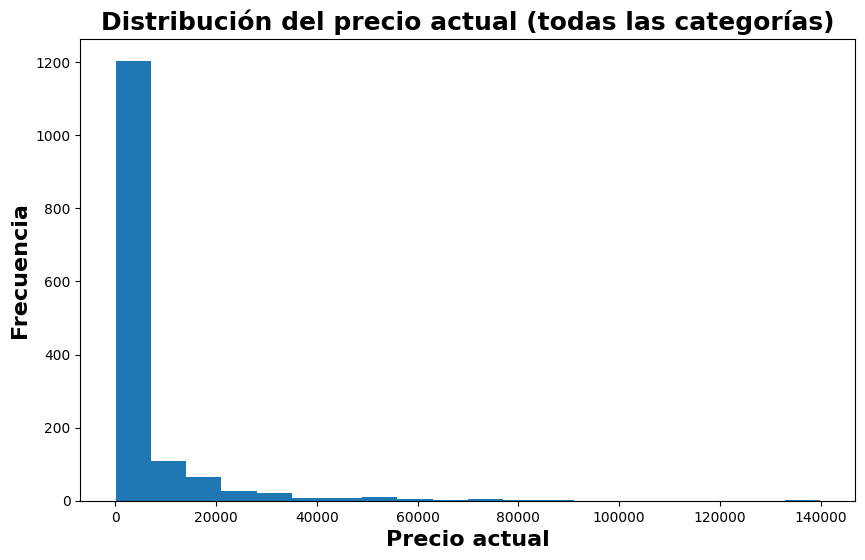

In [176]:
data.actual_price.hist(bins=20, figsize=(10, 6), grid=False)
plt.title('Distribuci√≥n del precio actual (todas las categor√≠as)', fontsize=18, fontweight="bold")
plt.xlabel('Precio actual', fontsize=16, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")
plt.show()

### An√°lisis de precio de una determinada categor√≠a

In [193]:
mas_popular = [top_categories.index[0]]
selected_categories = data[data['category'].isin(mas_popular)]

In [194]:
selected_categories.actual_price.describe().round(2)

count     233.00
mean      906.02
std       509.77
min       199.00
25%       499.00
50%       845.00
75%      1099.00
max      2100.00
Name: actual_price, dtype: float64

In [208]:
moda = selected_categories.groupby('actual_price')['actual_price'].count().sort_values(ascending = False).index[0]
mediana = np.quantile(selected_categories.actual_price, 0.5)
media = np.mean(selected_categories.actual_price)
print("Moda {0} - Mediana {1} - Media {2:.1f}".format(moda, mediana, media))

Moda 999.0 - Mediana 845.0 - Media 906.0


**Interpretaci√≥n de la relaci√≥n**

El orden que se da en la recta real es moda - mediana y media; por lo tanto, existe una ***asimetr√≠a negativa***.

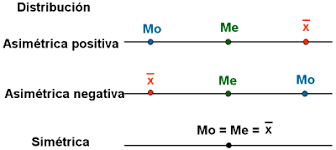

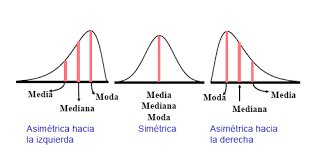

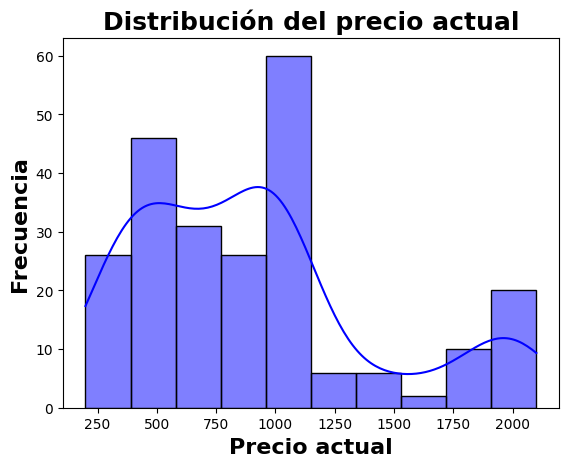

In [215]:
sns.histplot(selected_categories.actual_price, color='blue', edgecolor='black', kde=True)
plt.title('Distribuci√≥n del precio actual', fontsize=18, fontweight="bold")
plt.xlabel('Precio actual', fontsize=16, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")
plt.show()

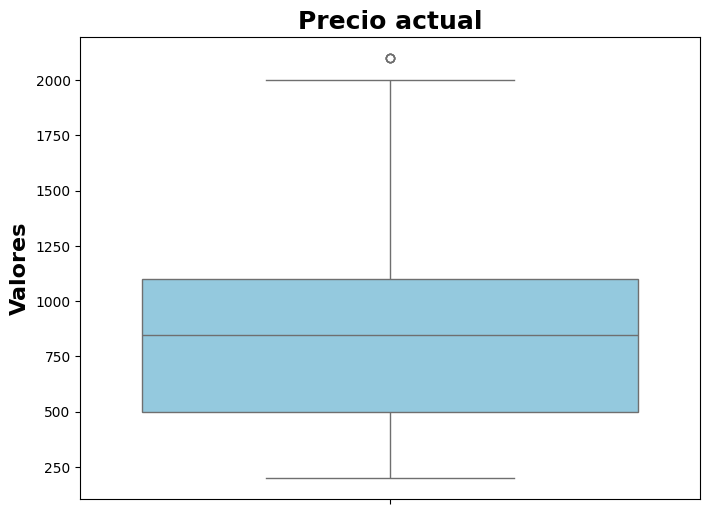

In [183]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=selected_categories['actual_price'], color='skyblue')
plt.title('Precio actual', fontsize=18, fontweight="bold")
#plt.xlabel('Valores', fontsize=16, fontweight="bold")
plt.ylabel('Valores', fontsize=16, fontweight="bold")
plt.show()

---
**Comentarios**

---

Este gr√°fico permite interpretar **distribuci√≥n, dispersi√≥n y valores at√≠picos**.

1. **Mediana (l√≠nea dentro de la caja):**

   * Est√° cerca de los **850‚Äì900**, lo que indica que la mitad de los precios est√°n por debajo y la otra mitad por encima de ese valor.

2. **Rango intercuart√≠lico (caja azul):**

   * Abarca aproximadamente entre **500 y 1.100**, mostrando d√≥nde se concentra el 50% central de los datos.
   * Esto indica que la mayor parte de los precios actuales est√°n en ese rango.

3. **Valores m√≠nimos y m√°ximos (bigotes):**

   * El valor m√≠nimo est√° cerca de **200**.
   * El valor m√°ximo sin considerar at√≠picos llega a **2.000**.

4. **Valores at√≠picos (puntos fuera de los bigotes):**

   * Se observa al menos un outlier ligeramente por encima de 2.000.
   * Estos valores son precios inusualmente altos en comparaci√≥n con el resto.

5. **Dispersi√≥n general:**

   * La distribuci√≥n es bastante amplia (desde \~200 hasta m√°s de 2.000).
   * Esto refleja que los precios actuales tienen gran variabilidad.

---

‚úÖ **Interpretaci√≥n en el negocio**

La mayor√≠a de los precios actuales se concentran entre **500 y 1.100**, con una mediana alrededor de **850‚Äì900**. Sin embargo, hay precios significativamente m√°s bajos (\~200) y algunos muy altos (>2,000) que aparecen como valores at√≠picos.


### Palabras m√°s comunes en los comentarios de los productos

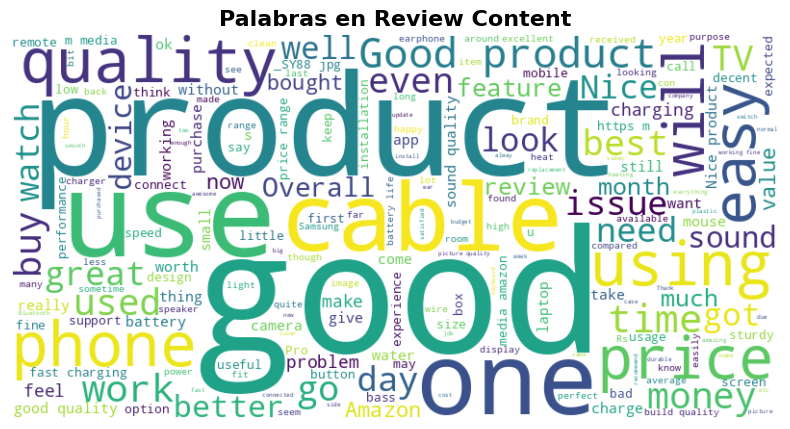

In [50]:
review_text = ' '.join(data['review_content'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras en Review Content", fontsize=16, fontweight="bold")
plt.show()

## An√°lisis bivariado

Se realiza un an√°lisis cruzando dos variables:

‚úÖ ```discount_price``` versus ```actual_price``` ‚û° Ver la correlaci√≥n entre el precio actual y el precio con descuento. Deber√≠a existir una tendencia positiva.

‚úÖ ```discount_percentage``` versus ```actual_price``` ‚û° Ver si los productos con precios m√°s altos presentan m√°s descuento o no.
‚úÖ ```discount_percentage``` versus ```rating``` ‚û° Ver si los productos con grandes descuentos reciben malas calificaciones.

‚úÖ ```category``` versus ```rating``` ‚û° Analizar c√≥mo las calificaciones var√¨an a trav√©s de las distintas categor√≠as.


###  ```discount_price``` versus ```actual_price```

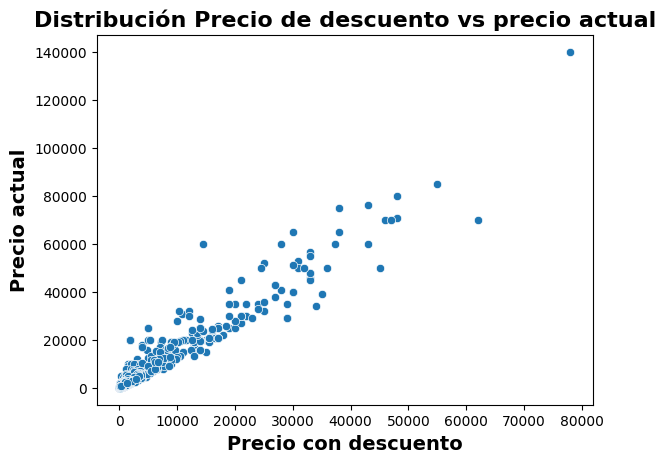

In [177]:
plt.title("Distribuci√≥n Precio de descuento vs precio actual", fontsize=16, fontweight="bold")
sns.scatterplot(data=data,x='discounted_price',y='actual_price',marker='o')
plt.ylabel('Precio actual', fontsize=14, fontweight="bold")
plt.xlabel('Precio con descuento', fontsize=14, fontweight="bold")
plt.show()

###  ```discount_percentage``` versus ```actual_price```

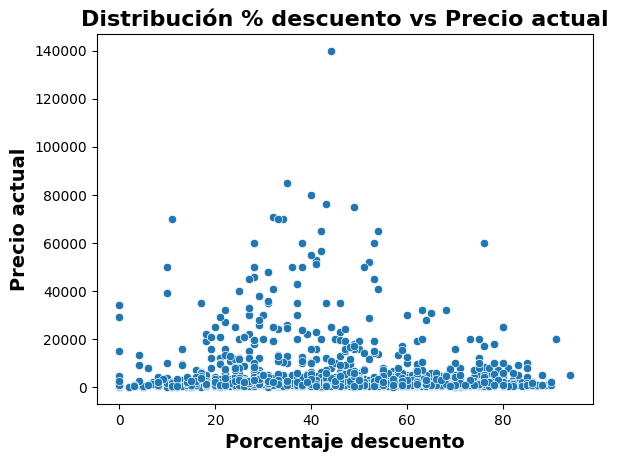

In [55]:
plt.title('Distribuci√≥n % descuento vs Precio actual', fontsize=16, fontweight="bold")
sns.scatterplot(data=data,x='discount_percentage',y = 'actual_price')
plt.ylabel('Precio actual', fontsize=14, fontweight="bold")
plt.xlabel('Porcentaje descuento', fontsize=14, fontweight="bold")
plt.show()

### ```discount_percentage``` versus ```rating```

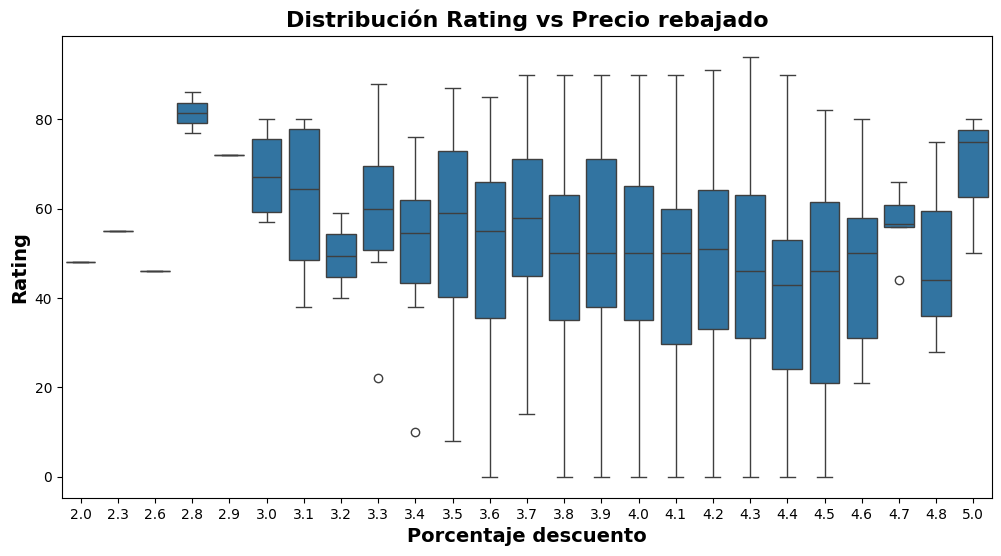

In [57]:
plt.figure(figsize=(12, 6))
plt.title("Distribuci√≥n Rating vs Precio rebajado", fontsize=16, fontweight="bold")
sns.boxplot(data=data,x='rating',y = 'discount_percentage')
plt.ylabel('Rating', fontsize=14, fontweight="bold")
plt.xlabel('Porcentaje descuento', fontsize=14, fontweight="bold")
plt.show()

---
**Comentarios**

---

Este gr√°fico (boxplot) est√° mostrando la relaci√≥n entre **porcentaje de descuento** y el **rating de los productos**.

---

**1. Tendencia general**

* No se aprecia una **relaci√≥n clara y lineal** entre mayor descuento y mejor rating.
* Los ratings tienden a dispersarse mucho m√°s cuando el porcentaje de descuento es alto, esto indica que hay m√°s variabilidad en la percepci√≥n de los clientes.

---

**2. Valores centrales (mediana)**

* Para descuentos bajos (aproximadamente 2.5% ‚Äì 3.0%), los ratings est√°n concentrados en valores m√°s altos (aproximadamente 70‚Äì85).
* A medida que el descuento crece (3.5% ‚Äì 4.5%), la mediana de ratings se va reduciendo (aproximadamente 40‚Äì60).
* Curiosamente, en el m√°ximo descuento (aproximadamente 5.0%), los ratings suben otra vez y se concentran entre 60‚Äì80.

---

**3. Dispersi√≥n**

* Con descuentos bajos, los ratings son **m√°s consistentes**, se aprecia porque son cajas peque√±as, sin grandes colas.
* Con descuentos intermedios (3.5 ‚Äì 4.5%), se da la mayor **variabilidad**: algunos productos tienen rating alt√≠simo y otros cercano a 0. Esto sugiere que no todos los productos con gran rebaja cumplen con la calidad esperada.
* Con el 5% de descuento, los ratings se estabilizan de nuevo, aunque con cierto rango.

---

**4. Outliers**

* En descuentos intermedios hay **outliers muy bajos (aproximadamente 0‚Äì20)**, esto indica que productos que, aunque rebajados, generaron **mala experiencia al cliente**.
* Con descuentos bajos o altos, casi no hay outliers negativos, lo que podr√≠a indicar que esas promociones est√°n m√°s cuidadas.

---

‚úÖ **Interpretaci√≥n para negocio**

* **No basta con ofrecer descuentos altos para garantizar satisfacci√≥n del cliente.**
* Los clientes parecen m√°s satisfechos con descuentos peque√±os o muy altos (5%), pero en el rango medio de descuentos hay una mezcla de productos que generan experiencias muy dispares.
* Esto puede reflejar una **estrategia de liquidaci√≥n de stock**: los descuentos intermedios aplican a productos de calidad desigual.

---


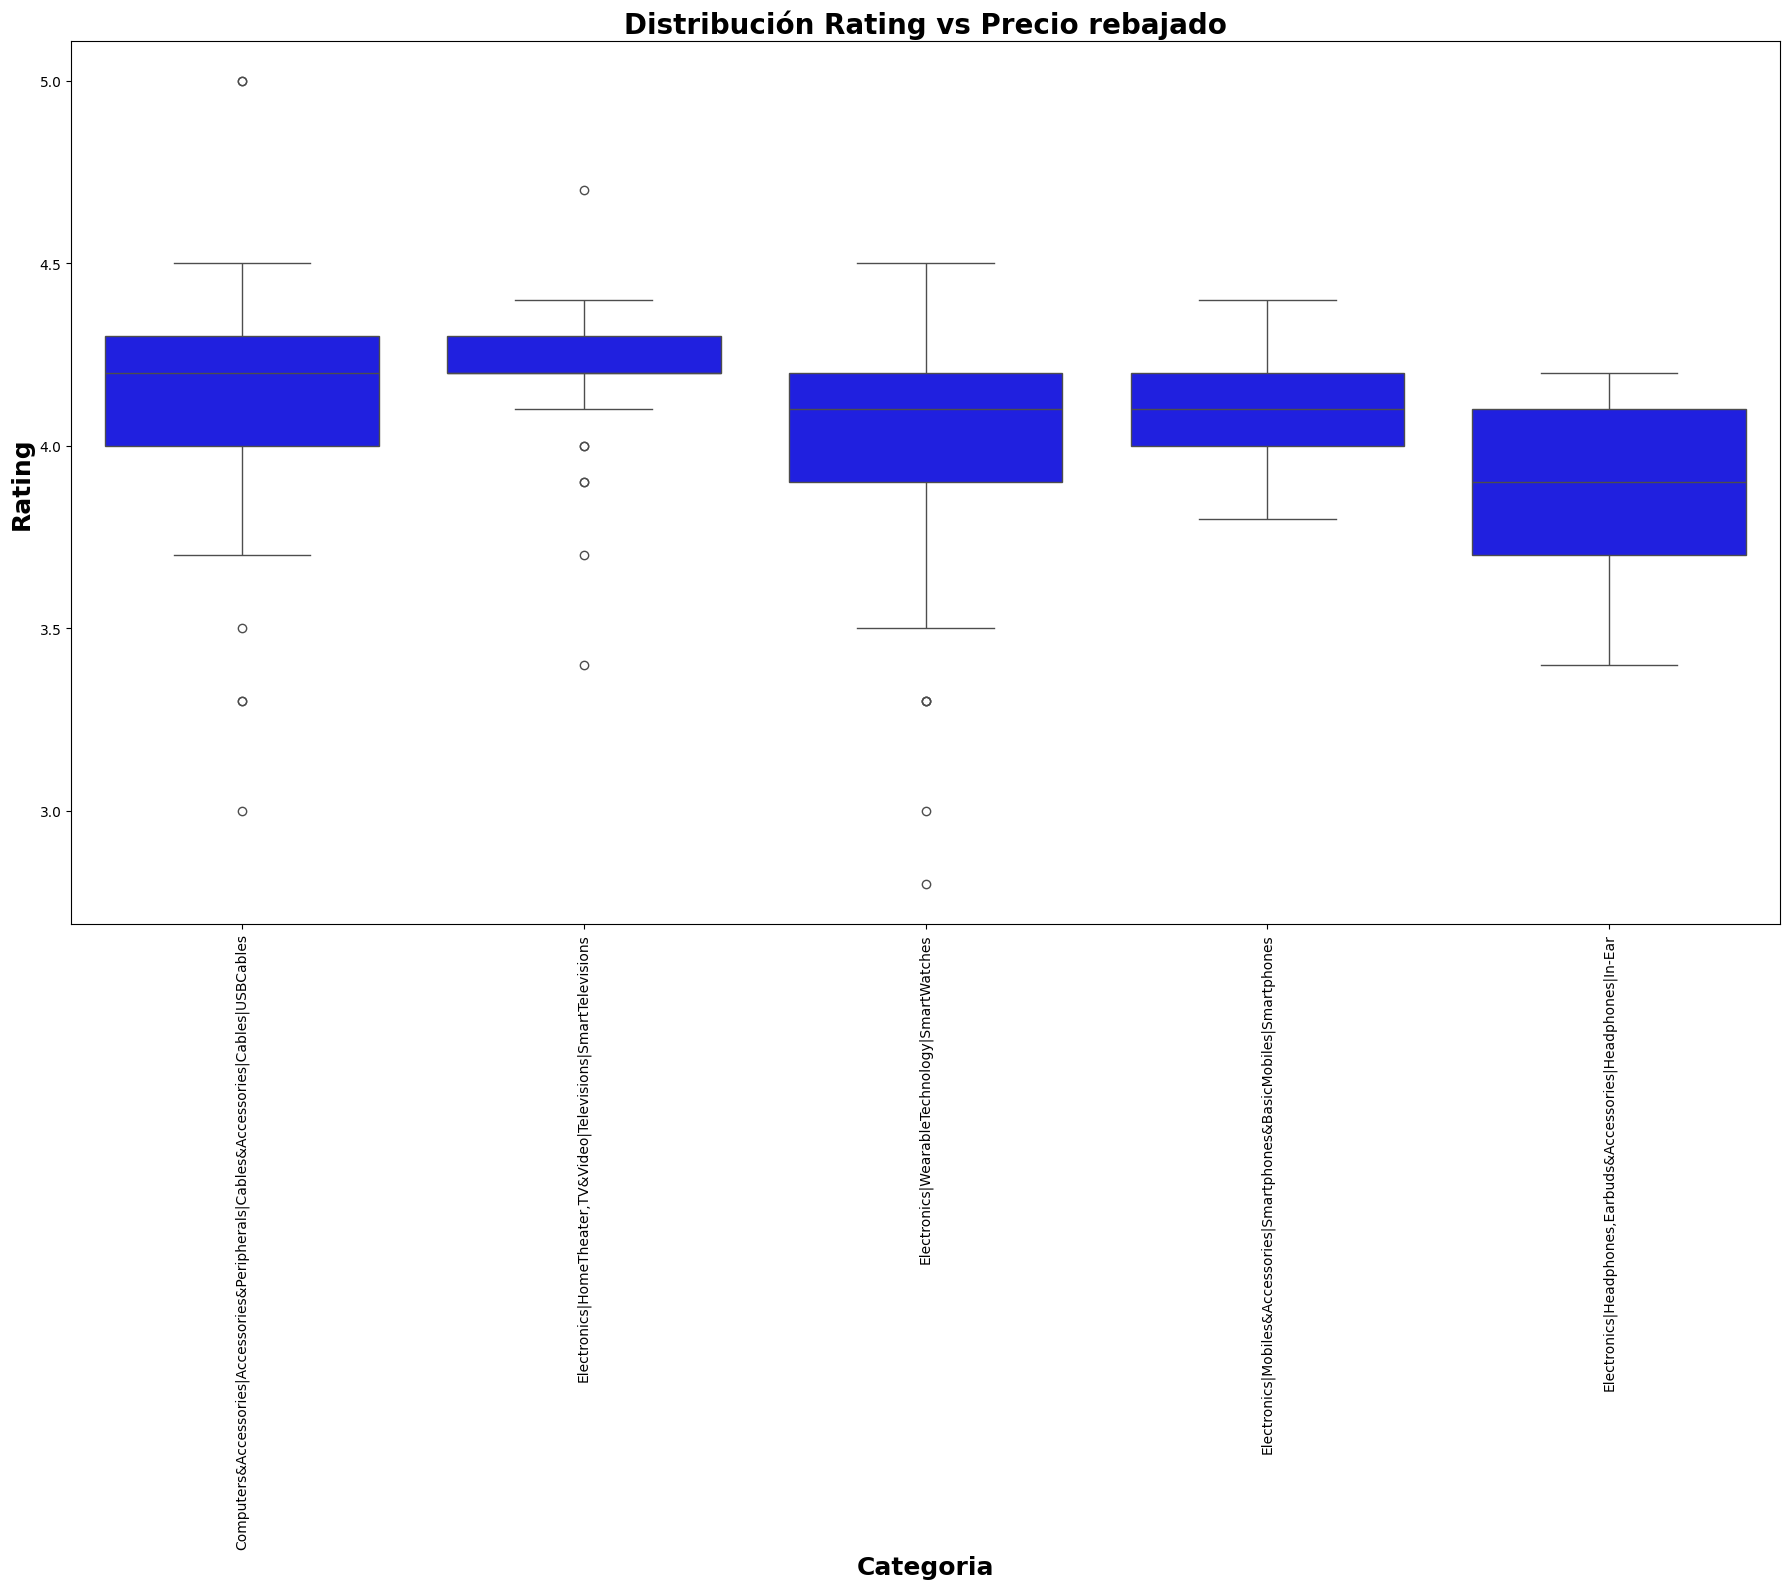

In [68]:
selected_data = data[data['category'].isin(top_categories.index)]
plt.figure(figsize=(18, 16))
plt.title("Distribuci√≥n Rating vs Precio rebajado", fontsize=20, fontweight="bold")
sns.boxplot(data=selected_data, x = 'category', y = 'rating',color='blue')
plt.ylabel('Rating', fontsize=18, fontweight="bold")
plt.xlabel('Categoria', fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.tight_layout()

**Comentarios**

Respecto de las 5 categor√≠as m√°s populares con el *rating* de los productos:

---

**1. Tendencia central (mediana de ratings)**

* Todas las categor√≠as se mueven entre **3.8 y 4.3 aprox.**, lo que indica que los productos m√°s populares suelen estar **bien evaluados en general**.
* La categor√≠a con **mediana m√°s alta** se ve en *Electr√≥nica y Smartphones* (segunda categor√≠a m√°s popular), lo que refleja **mejor valoraci√≥n promedio de los clientes**.
* La categor√≠a con **mediana m√°s baja** es *Electr√≥nica/Hogar peque√±os electrodom√©sticos* ‚Üí los productos ah√≠ tienden a recibir valoraciones algo menores.

---

**2. Dispersi√≥n (caja e IQR)**

* Categor√≠as como *Computaci√≥n/Accesorios* y *Electr√≥nica Hogar* tienen cajas m√°s amplias, es decir, presentan mayor **variabilidad en la percepci√≥n de los clientes**.
* Otras categor√≠as como *Smartphones* tienen cajas m√°s compactas, es decir, los ratings son m√°s **consistentes y predecibles**.

---

**3. Outliers**

* Se observan varios puntos por debajo de 3, especialmente en *Wearables y Hogar*. Esto indica que, aunque en promedio los ratings son buenos, **existen productos muy mal evaluados** en esas categor√≠as.
* Algunas categor√≠as muestran outliers en la parte alta (cerca de 5) ‚Üí productos con **valoraciones perfectas** que destacan sobre la media.

---

**4. Comparaci√≥n general**

* No hay categor√≠as con mediana inferior a 3.5 ‚Üí en general el p√∫blico **percibe calidad aceptable en todas**.
* Sin embargo, la **percepci√≥n de calidad no es uniforme**: en *Wearables y Hogar* la dispersi√≥n sugiere que algunos productos funcionan muy bien, pero otros generan bastante insatisfacci√≥n.

---

‚úÖ **Interpretaci√≥n con sentido de negocio:**

El gr√°fico muestra que aunque las categor√≠as m√°s populares suelen mantener ratings buenos (entre 4 y 4.3), la **consistencia y satisfacci√≥n de los clientes var√≠a mucho seg√∫n la categor√≠a**. Para un equipo de negocio, este an√°lisis permitir√≠a identificar **d√≥nde reforzar controles de calidad o selecci√≥n de productos** (por ejemplo, Wearables y Hogar) y d√≥nde se mantiene una experiencia estable (por ejemplo, Smartphones).

---


### ```category``` versus ```rating```

In [ ]:
selected_categories = top_categories.index[1:3]
selected_categories = data[data['category'].isin(np.array(selected_categories))]

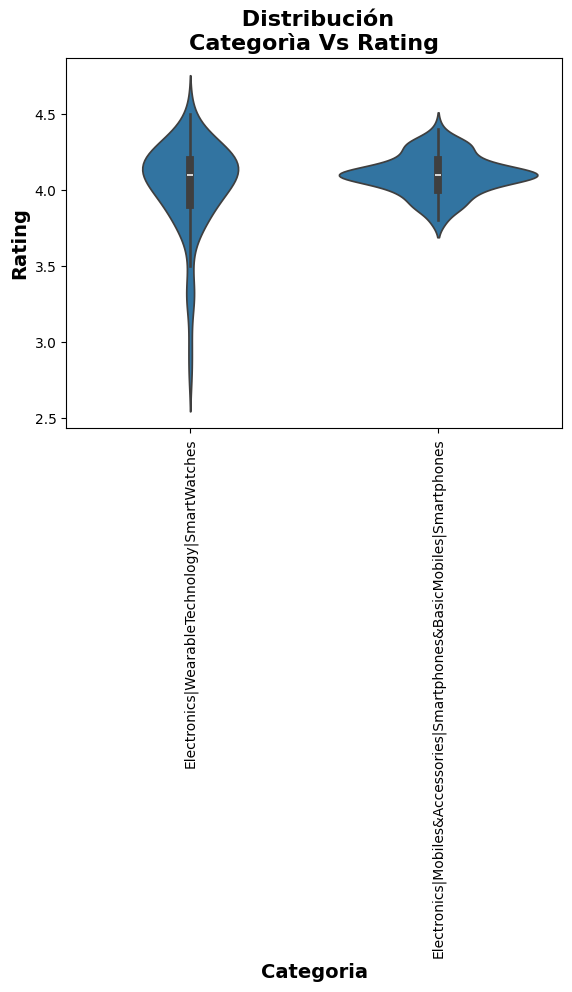

In [161]:
plt.title(' Distribuci√≥n\nCategor√¨a Vs Rating', fontsize=16, fontweight="bold")
sns.violinplot(data=selected_categories, x='category', y='rating')
plt.xlabel('Categoria', fontsize=14, fontweight="bold")
plt.ylabel('Rating', fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

---
**Comentarios**

---
Este gr√°fico muestra la distribuci√≥n de los **ratings** para las 2 categor√≠as m√°s populares de productos.


---

**Interpretaciones**

1. **Forma de la distribuci√≥n**

   * La categor√≠a **Smartwatches** muestra una distribuci√≥n un poco m√°s extendida (con colas hacia abajo), indicando que algunos productos reciben valoraciones m√°s bajas (en torno a 3.3 ‚Äì 3.5).
   * La categor√≠a **Smartphones** tiene una distribuci√≥n m√°s concentrada en torno a 4.0 ‚Äì 4.2, lo que indica mayor consistencia en las valoraciones.

2. **Mediana del rating**

   * En ambos casos, la mediana se ubica sobre **4.0**, lo que refleja en general buena aceptaci√≥n de los productos.
   * **Smartphones** parecen tener una mediana ligeramente m√°s estable (menos dispersi√≥n alrededor del 4).

3. **Dispersi√≥n y variabilidad**

   * Los **Smartwatches** presentan m√°s variabilidad en la percepci√≥n de calidad: algunos con valoraciones bajas (\~3.0), pero la mayor√≠a bien valorados (>4).
   * Los **Smartphones** tienen menos productos con malas valoraciones, siendo un grupo m√°s homog√©neo.

4. **Conclusi√≥n pr√°ctica**

   * Ambos tipos de productos son bien evaluados, pero **Smartphones** generan opiniones m√°s consistentes.
   * **Smartwatches** podr√≠an estar m√°s sujetos a diferencias de calidad entre modelos/marcas, lo que explica la mayor dispersi√≥n.

---

Los **violin plots permiten ver tanto la tendencia central (mediana) como la forma de la distribuci√≥n (asimetr√≠a, colas, concentraci√≥n de datos)**, algo que no siempre es tan evidente en un boxplot.

---



## An√°lisis de correlaci√≥n

### An√°lisis considerando todas las categor√≠as

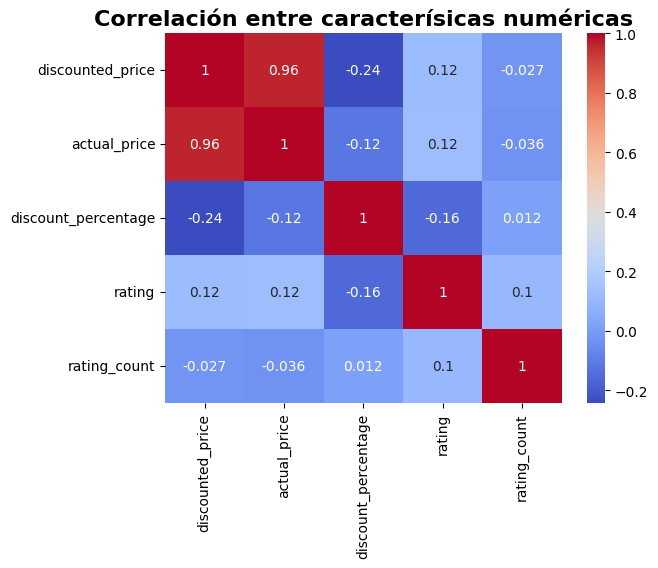

In [59]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlaci√≥n entre caracter√≠sicas num√©ricas", fontsize=16, fontweight="bold")
plt.show()

---
**Comentarios**

---
Este gr√°fico muestra c√≥mo se relacionan entre s√≠ las variables num√©ricas del dataset. Vamos con el an√°lisis:

---

**Observaciones principales**

1. **discounted\_price vs actual\_price (0.96)**

   * Correlaci√≥n **muy alta y positiva**.
   * Esto es esperable porque el precio con descuento se calcula directamente a partir del precio original.
   * En la pr√°ctica: **si sube el precio original, tambi√©n sube el precio con descuento**.

2. **discount\_percentage con precios (-0.24 y -0.12)**

   * Relaci√≥n **negativa d√©bil**.
   * Indica que a mayor porcentaje de descuento, tienden a bajar tanto el precio original como el rebajado, pero la relaci√≥n no es fuerte.
   * Posible explicaci√≥n: los productos m√°s caros no siempre reciben los descuentos m√°s grandes.

3. **rating con otras variables (\~0.1 ‚Äì 0.12)**

   * Correlaci√≥n **muy d√©bil** con precios y descuentos.
   * Esto sugiere que el nivel de descuento o el precio del producto **no influyen demasiado en la calificaci√≥n de los usuarios**.
   * Los clientes parecen evaluar m√°s por calidad/experiencia que por el precio.

4. **rating\_count con rating (0.1)**

   * Relaci√≥n **ligeramente positiva**: productos con m√°s rese√±as tienden a tener una buena valoraci√≥n, aunque la relaci√≥n es d√©bil.
   * Esto podr√≠a indicar que la popularidad **no garantiza** una calificaci√≥n muy alta, pero tampoco suele ser negativa.

---

**Conclusiones generales**

* La √∫nica correlaci√≥n **fuerte** es entre `discounted_price` y `actual_price` (l√≥gica, porque son dependientes).
* Las variables de **precios y descuentos tienen poca relaci√≥n con las valoraciones** (`rating`).
* El **rating\_count** muestra independencia de precios y descuentos, lo que sugiere que la cantidad de rese√±as depende de otros factores (popularidad de la marca, marketing, visibilidad del producto).
* Para an√°lisis predictivo:

  * **Precios** son buenos predictores entre s√≠.
  * **Ratings y rese√±as** deben analizarse con variables adicionales (ej. categor√≠a, marca) para explicar mejor el comportamiento.

---

‚úÖ **Interpretaci√≥n en el negocio**

El precio original y el precio con descuento est√°n fuertemente relacionados, pero los precios y descuentos no parecen afectar mucho la percepci√≥n de calidad de los usuarios (ratings). Esto sugiere que el valor percibido por los clientes depende m√°s de factores de producto que de estrategias de precios.

¬øQuieres que te prepare una **versi√≥n lista para usar en diapositiva** (con vi√±etas y breve interpretaci√≥n visual) para este gr√°fico tambi√©n?


### An√°lisis considerando la categor√≠a m√°s popular

Considerando la misma l√≥gica aplicada en el an√°lisis del precio, ac√° se realiza el an√°lisis considerando s√≥lo una categor√≠a; en este caso, la categor√≠a m√°s popular

In [163]:
mas_popular = [top_categories.index[0]]
selected_data_corr = data[data['category'].isin(mas_popular)]

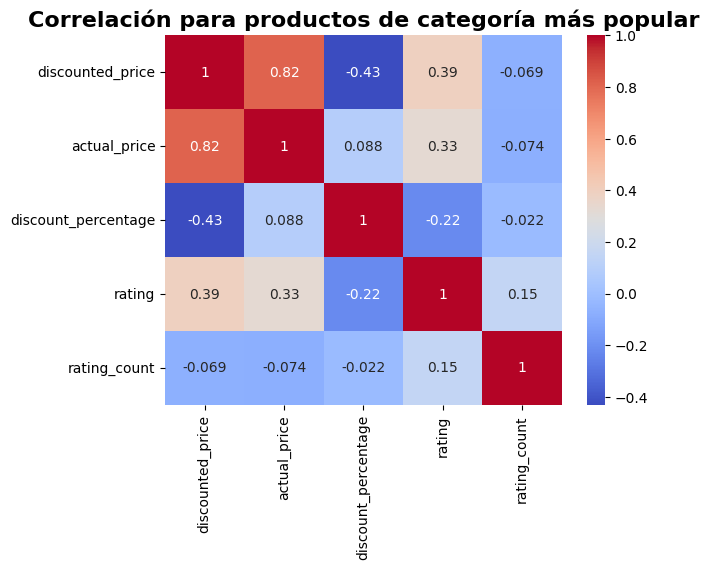

In [165]:
sns.heatmap(selected_data_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlaci√≥n para productos de categor√≠a m√°s popular", fontsize=16, fontweight="bold")
plt.show()

---
**Comentarios**

---

1. **discounted\_price vs actual\_price (0.82)**

   * Correlaci√≥n **alta y positiva**, aunque un poco menor que en el an√°lisis con todos los productos (0.96).
   * En esta categor√≠a, el precio con descuento sigue dependiendo fuertemente del precio original, pero hay **m√°s variabilidad en los descuentos aplicados**.

2. **discount\_percentage con precios (-0.43 con discounted\_price, +0.088 con actual\_price)**

   * La relaci√≥n con el **precio con descuento es claramente negativa**:
     cuanto mayor es el porcentaje de descuento, menor es el precio rebajado (l√≥gico).
   * Sin embargo, con el **precio original casi no hay relaci√≥n**, lo que indica que en esta categor√≠a los descuentos **no se aplican de forma proporcional al precio inicial** (ej. un producto caro puede tener un descuento bajo y otro barato, un descuento alto).

3. **rating con precios (0.39 con discounted\_price, 0.33 con actual\_price)**

   * Aqu√≠ aparece algo muy interesante:
     hay una **correlaci√≥n positiva moderada** entre precio y calificaci√≥n.
   * Esto sugiere que en esta categor√≠a, los productos m√°s caros tienden a recibir **mejores valoraciones de los clientes**.
   * Puede deberse a que los modelos m√°s costosos son percibidos como de mayor calidad.

4. **rating con discount\_percentage (-0.22)**

   * Correlaci√≥n negativa d√©bil: productos con mayores descuentos tienden a tener calificaciones algo m√°s bajas.
   * Esto podr√≠a reflejar una percepci√≥n de que lo muy rebajado quiz√°s es menos valorado por los usuarios.

5. **rating\_count (rese√±as) con rating (0.15)**

   * Relaci√≥n d√©bil, pero positiva: m√°s rese√±as tienden a asociarse con buenas calificaciones.
   * En esta categor√≠a, la popularidad s√≠ se relaciona un poco con mejor percepci√≥n.

---

**Conclusiones para esta categor√≠a**

* A diferencia del an√°lisis general, aqu√≠ el **precio se asocia con la valoraci√≥n de los usuarios** ‚Üí m√°s caro = mejor rating.
* El **descuento alto no garantiza mejor percepci√≥n**, incluso podr√≠a asociarse a calificaciones m√°s bajas.
* La relaci√≥n entre precios rebajados y originales sigue siendo fuerte, pero con m√°s dispersi√≥n que en el conjunto completo.
* Esto sugiere que **analizar por categor√≠a revela patrones espec√≠ficos de comportamiento del consumidor**.

---

‚úÖ **Interpretaci√≥n en el negocio**

* Precios y ratings est√°n **m√°s conectados** en esta categor√≠a.
* Descuentos altos **no necesariamente atraen buenas valoraciones**.
* Se confirma que el an√°lisis global puede **ocultar particularidades de cada categor√≠a**.




In [166]:
segunda_mas_popular = [top_categories.index[1]]
selected_data_corr = data[data['category'].isin(segunda_mas_popular)]

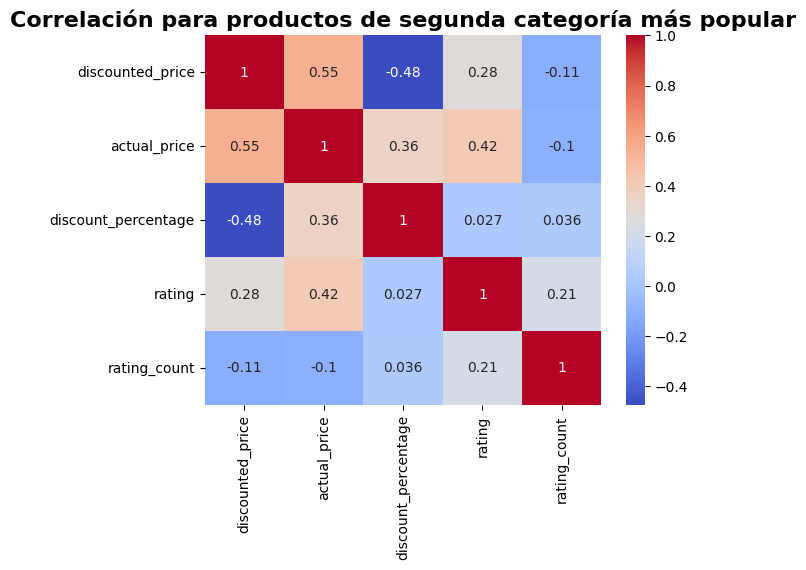

In [167]:
sns.heatmap(selected_data_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlaci√≥n para productos de segunda categor√≠a m√°s popular", fontsize=16, fontweight="bold")
plt.show()